 ## Twitter Account
 Create an account on Twitter using your georgetown account.
 [Twitter setup page](https://developer.twitter.com/en/docs/twitter-api/getting-started/getting-access-to-the-twitter-api) will guide you in the process. You will need to create an app to get access to the API. Once you have access to the API use the [step-by-step guide](https://developer.twitter.com/en/docs/tutorials/step-by-step-guide-to-making-your-first-request-to-the-twitter-api-v2) to create an app and project. Remember to copy the keys in a txt file on your local machine. It will come very handy for porject and assignments.

In [1]:
import pandas as pd
import os
import time
import requests
import json
import csv
from tqdm import tqdm
from matplotlib import pyplot as plt

import tweepy

import requests
import pandas as pd
import os

f = open("api-keys.json")
input=json.load(f); 
consumer_key=input["consumer_key"]    
consumer_secret=input["consumer_secret"]    
access_token=input["access_token"]    
access_token_secret=input["access_token_secret"]    
bearer_token=input["bearer_token"]   


 ## extract specific keys from the api structure above.

 ## Set the twitter authentication and bearer token and verify the screen name.

In [2]:
from email import header


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)



In [4]:
# Obtaining tweets from specific user

# user = 'SFCarBreakins'
# #limit = 1000
# tweet_fields = "tweet.fields=text,created_at"

# #tweets = tweepy.Cursor(api.user_timeline, screen_name=user, count=200, tweet_mode='extended').items(limit)
# tweets = api.user_timeline(screen_name=user, count=200,tweet_mode='extended')
# columns = ['User','Tweet']
# data = []

# for tweet in tweets:
#     data.append([tweet.user.screen_name, tweet.full_text])

# df=pd.DataFrame(data, columns=columns)

# df2=df.drop(columns=['User'])

In [6]:
# df2.to_csv(r'./sf_carbreakin-200.txt', header=None, index=None, sep='\t', mode='a')
#df2.to_csv('./sf_carbreakin1.csv', index= False)

In [12]:

keywords = 'Broken into'
limit =100

tweets = tweepy.Cursor(api.search_tweets, q = keywords, count=100, tweet_mode='extended').items(limit)
columns = ['Tweet']
data = []

for tweet in tweets:
    data.append([tweet.full_text])

row_df = pd.DataFrame(data, columns=columns)
row_df.to_csv('./breakin_prediction.csv', index= False)

In [ ]:
# Add the search_twitter function here.

from urllib import response


def search_twitter(query, tweet_fields, bearer_token = bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}

    url = "https://api.twitter.com/2/tweets/search/recent?query={}&{}".format(query, tweet_fields)
    
    print("--------------",url,"--------------")
    response = requests.request("GET", url, headers=headers)

    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [ ]:
query = "Broken into OR Smashed Window"
number_of_tweets =100
searched_tweet = search_twitter(query=query, lang='en', count=number_of_tweets, tweet_mode='extended')

raw_tweet = []

for i in range(0, number_of_tweets):
    raw_tweet.append([searched_tweet[i]._json[],])


In [4]:
def extract_timeline_as_df(timeline_list):
    columns = set()
    allowed_types = [str, int]
    tweets_data = []
    for status in timeline_list:
        status_dict = dict(vars(status))
        keys = status_dict.keys()
        single_tweet_data =  {'user':status.user.screen_name, 'author': status.author.screen_name}
        for k in keys:
            try:
                v_type = type(status_dict[k])
            except:
                v_type = None
            if v_type != None:
                if v_type in allowed_types:
                    single_tweet_data[k] =  status_dict[k]
                    columns.add(k)
        tweets_data.append(single_tweet_data)
        header_cols = list(columns)
        header_cols.append('user')
        header_cols.append('author')
        df = pd.DataFrame(tweets_data, columns=header_cols)
        return df

In [17]:


#users = "SFCarBreakins"
id = 3630708511
user = api.get_user(user_id=id)
#user = api.get_user("SFCarBreakins")
users_timeline = user.timeline()
df2 = extract_timeline_as_df(users_timeline)

df2

,source,id,id_str,text,favorite_count,lang,source_url,retweet_count,user,author
0,Twitter for iPhone,1572930571923496962,1572930571923496962,RT @evansemones: Tracked my work phone to 634 ...,0,en,http://twitter.com/download/iphone,1,SFCarBreakins,SFCarBreakins


In [4]:

import requests
import os
import json

def create_url():
    # User fields are adjustable, options include:
    # created_at, description, entities, id, location, name,
    # pinned_tweet_id, profile_image_url, protected,
    # public_metrics, url, username, verified, and withheld
    user_fields = "user.fields=created_at,description"
    # You can replace the ID given with the Tweet ID you wish to lookup Retweeting users for
    # You can find an ID by using the Tweet lookup endpoint
    id = "1354143047324299264"
    # You can adjust ids to include a single Tweets.
    # Or you can add to up to 100 comma-separated IDs
    url = "https://api.twitter.com/2/tweets/{}/retweeted_by".format(id)
    return url, user_fields


def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RetweetedByPython"
    return r


def connect_to_endpoint(url, user_fields):
    response = requests.request("GET", url, auth=bearer_oauth, params=user_fields)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(
            "Request returned an error: {} {}".format(
                response.status_code, response.text
            )
        )
    return response.json()


def main():
    url, user_fields = create_url()
    json_response = connect_to_endpoint(url, user_fields)
    print(json.dumps(json_response, indent=4, sort_keys=True))


if __name__ == "__main__":
    main()

200
{
    "data": [
        {
            "created_at": "2019-01-20T08:47:23.000Z",
            "description": "",
            "id": "1086908030866751490",
            "name": "luxury",
            "username": "luxury11797085"
        },
        {
            "created_at": "2014-07-13T06:37:04.000Z",
            "description": "",
            "id": "2635178808",
            "name": "letian",
            "username": "letian007"
        },
        {
            "created_at": "2022-08-02T08:49:55.000Z",
            "description": "",
            "id": "1554388936403095552",
            "name": "Linxuan Li",
            "username": "LinxuanLifo"
        },
        {
            "created_at": "2022-09-06T12:16:23.000Z",
            "description": "",
            "id": "1567124486075580417",
            "name": "Lifeng Zhang",
            "username": "LifengZhang19"
        },
        {
            "created_at": "2022-01-07T09:48:15.000Z",
            "description": "hi, Twitter rejected my 

 ## Write the search_twitter function form the twitter API. Instead of copying please type it, you need to get used to writing the code.

Set up a basic tweet gathering mechanism. Lets search Worldcup and get 250 tweets. When you are doing this for the your own project use O-O python classes and methods. It makes the code look clean and helps reduce redundancies.

* bearer_token [str]: the bearer token you copied in Step 1.

* query [str]: This is the actual string that will be used for matching the desired Tweets. These query strings can be simple such as “Worldcup” or very complex. They allow you to filter tweets by hashtags, identify retweets, exclude certain words or phrases, or only include tweets of a specific language. A dedicated description of how to write these query strings can be found here.

* tweet_fields [str]: Fields to return in the query, such as attachments, author_id, text, etc. If you for example want the author_id, text, and publishing date of the tweet, the tweet_fields string would look like tweet.fields=text,author_id,created_at. ` A very detailed API reference can be found here. Other optional parameters that you can include in the function are described in the reference. Here three very useful ones:

* max_results: parameters that specify how many tweets should be returned: A number between 10 and the system limit (currently 100). By default, a request response will return 10 results.

* start_time: The oldest UTC timestamp (from most recent seven days) from which the Tweets will be provided. (YYYY-MM-DDTHH:mm:ssZ (ISO 8601/RFC 3339).)

* end_time: The newest, most recent UTC timestamp to which the Tweets will be provided. (YYYY-MM-DDTHH:mm:ssZ (ISO 8601/RFC 3339).

In [3]:
# Add the search_twitter function here.

from urllib import response


def search_twitter(query, max_results, tweet_fileds, bearer_token = bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    url = "https://api.twitter.com/2/tweets/search/recent?query={}&max_results={}&{}".format(query, max_results, tweet_fileds)
    print("--------------",url,"--------------")
    response = requests.request("GET", url, headers=headers)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()


 create query, twitter fields, and a json list to gather the tweets from the query

In [9]:
# search term

search_item = ['Car Break', 'Car BreakIn','SF','San Francisco','SF Car BreakIn','San Francisco Car BreakIn']
tweet_fields = "tweet.fields=text,author_id,created_at,lang"
tweet_res = [100,100,50]
tweets_jsondata =[]
data_path = './data/'
figure_path = './figures/'

for tindex, tval in enumerate(search_item):
    tweets_jsondump =[]
    for nidx, nval in enumerate(tweet_res):
        json_response = search_twitter(query=tval, max_results=nval, tweet_fileds=tweet_fields,bearer_token=bearer_token)
        for i in json_response['data']:
            tweets_jsondata.append(i)
        with open(data_path+tval+'-250-tweets.json','w') as json_file:
            json.dump(tweets_jsondata,json_file)
            json_file.close()

-------------- https://api.twitter.com/2/tweets/search/recent?query=Car Break&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=Car Break&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=Car Break&max_results=50&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=Car BreakIn&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=Car BreakIn&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=Car BreakIn&max_results=50&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=SF&max_res

KeyError: 'data'

In [ ]:
query = "Car Breakin OR Breakin OR Larcenry from car OR Car Breakins OR England"
tweet_fields = "tweet.fields=text,author_id,created_at,lang"
json_response4 = search_twitter(query=query, max_results=1000, tweet_fileds=tweet_fields, bearer_token=bearer_token)
jsontweets = []
for i in json_response4['data']:
    jsontweets.append(i)
with open(data_path+'tweets4.json', 'w') as json_file:
    json.dump(jsontweets, json_file)
    json_file.close()

data_path = './data/'
figure_path = './figures/'
open_tweets = open(data_path+'tweets4.json')
load_tweets =json.load(open_tweets)
tweetsdf_4 = pd.DataFrame(load_tweets)

In [ ]:
# pretty printing
print(json.dumps(json_response, indent=4, sort_keys=True))

{
    "data": [
        {
            "author_id": "31897231",
            "created_at": "2022-09-14T20:14:26.000Z",
            "id": "1570143961674817537",
            "lang": "en",
            "text": "RT @PalmerReport: 1) This is why Pelosi is so brilliant. The Democrats' odds of winning the House keep improving and they're now only sligh\u2026"
        },
        {
            "author_id": "1194781064247611394",
            "created_at": "2022-09-14T20:14:26.000Z",
            "id": "1570143961607438346",
            "lang": "en",
            "text": "RT @CashApp: It\u2019s time for another #CashAppPay deal. QRT this with your $cashtag for a chance to win 99% off at American Eagle (max discoun\u2026"
        },
        {
            "author_id": "64411349",
            "created_at": "2022-09-14T20:14:26.000Z",
            "id": "1570143961377026049",
            "lang": "en",
            "text": "@Ivdown12 @EmSheDoesIt @theaceofspaeder Vlad Jr was the best last yr but Sho was the 

### Question 4

Number of Tweets containing Brazil are 8
Number of Tweets containing Germany are 14
Number of Tweets containing France are 24
Number of Tweets containing Argentina are 19
Number of Tweets containing England are 11


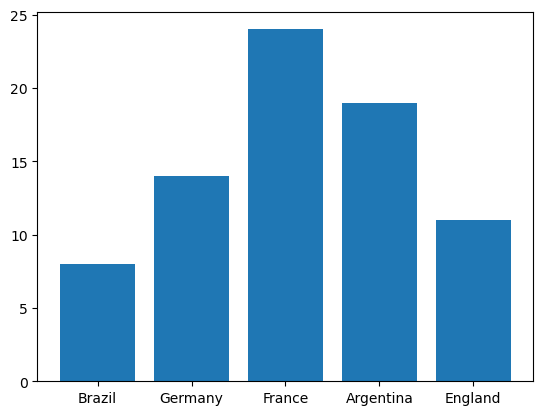

In [ ]:
query = "Brazil OR germany OR France OR Argentina OR England"
tweet_fields = "tweet.fields=text,author_id,created_at,lang"
json_response4 = search_twitter(query=query, max_results=100, tweet_fileds=tweet_fields, bearer_token=bearer_token)
jsontweets = []
for i in json_response4['data']:
    jsontweets.append(i)
with open(data_path+'tweets4.json', 'w') as json_file:
    json.dump(jsontweets, json_file)
    json_file.close()

data_path = './data/'
figure_path = './figures/'
open_tweets = open(data_path+'tweets4.json')
load_tweets =json.load(open_tweets)
tweetsdf_4 = pd.DataFrame(load_tweets)

def keyword_count(word):
    counter =0
    for i in range(len(tweetsdf_4.text)):
        if word in tweetsdf_4['text'][i]:
            counter +=1
    print('Number of Tweets containing ' + word + ' are '+ str(counter))
    return counter

brazilsupport = keyword_count("Brazil")
Germansupport = keyword_count('Germany')
Francesupport = keyword_count('France')
Argsupport = keyword_count('Argentina')
Englandsupport = keyword_count('England')

plot_df = pd.DataFrame({'Country':["Brazil", 'Germany','France','Argentina','England'], 'support_count':[brazilsupport,Germansupport,Francesupport,Argsupport,Englandsupport]})
plt.bar('Country','support_count', data=plot_df)
ax.set_title ("Country Support in twitter")
ax.set_xlabel("Counts")
ax.set_ylabel("country")
fig = ax.get_figure()
fig.savefig('./figures/lab_1.2_support.pdf')
fig.savefig('./figures/lab_1.2_support.jpg',dpi=300) 

